# Example Analysis Notebook for Interface Mixing with rsflash

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 

In [2]:
plt.matplotlib.rc('xtick', labelsize=30)
plt.matplotlib.rc('ytick', labelsize=30)

Load the dataset

In [3]:
path='/home/vagrant/jupyter/StaffScratch/diaw/PlasmaP/Multi-BGK/Data/ko-fe/'
path='/home/vagrant/jupyter/StaffScratch/diaw/PlasmaP/Multi-BGK/Data/'
path_to_rsflash = '/home/vagrant/jupyter/StaffScratch/abdoudiaw/rsflash/'
if not path_to_rsflash in sys.path: sys.path.insert(1, path_to_rsflash)

In [4]:
prefix = path+"modmd_script"
x = np.loadtxt(prefix + "_x")
x = x * 10000 #convert to microns
time = np.loadtxt(prefix + "_time")

In [5]:
len(time)

3

In [6]:
time

array([1.00e-12, 2.00e-12, 2.01e-12])

In [7]:
idx=-1

Load data

In [8]:
dens0 = np.loadtxt(prefix + "_dens0")
dens1 = np.loadtxt(prefix + "_dens1")
dens2 = np.loadtxt(prefix + "_dens2")
dens3 = np.loadtxt(prefix + "_dens3")
dens4 = np.loadtxt(prefix + "_dens4")

velo0 = np.loadtxt(prefix + "_velo0")
velo1 = np.loadtxt(prefix + "_velo1")
velo2 = np.loadtxt(prefix + "_velo2")
velo3 = np.loadtxt(prefix + "_velo3")
velo4 = np.loadtxt(prefix + "_velo4")


## Plotting the spatial profiles: densities, velocities, temperatures

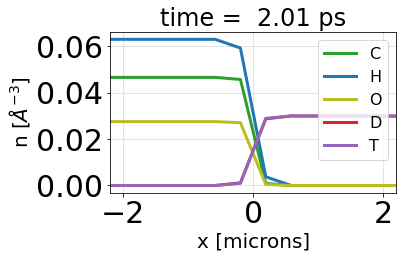

In [9]:
fig, ax1 = plt.subplots(1,1)

ax1.grid(linestyle='dashed', linewidth='0.5')
mpl.style.context('rs_paper')
    
LW=20
mpl.rcParams['figure.figsize'] = 8,4
mpl.rc('font', size = LW)
mpl.rc('xtick', labelsize=LW)
mpl.rc('ytick', labelsize=LW)


colors=['#2ca02c','#1f77b4','#bcbd22', '#d62728', '#9467bd']
labels=['C', 'H', 'O','D', 'T']
mass = np.array([1.9926e-23,1.6605e-24,2.6566e-23,3.3210778e-24,5.0083e-24])
eps=1.e-20
cvt=1.6008e-19  # units conversion
convert_cc2AA =1.e-24

ax1.plot(x,dens0[idx]*convert_cc2AA,color=colors[0],label=str(labels[0]),linewidth=3.0)
ax1.plot(x,dens1[idx]*convert_cc2AA,color=colors[1],label=str(labels[1]),linewidth=3.0)
ax1.plot(x,dens2[idx]*convert_cc2AA*50,color=colors[2],label=str(labels[2]),linewidth=3.0)
ax1.plot(x,dens3[idx]*convert_cc2AA,color=colors[3],label=str(labels[3]),linewidth=3.0)
ax1.plot(x,dens4[idx]*convert_cc2AA,color=colors[4],label=str(labels[4]),linewidth=3.0)
ax1.set_xlim(-2.2,2.2) 
ax1.set_title('time =  {:.2f} ps'.format(time[idx]*1e12))
ax1.set_ylabel(r'n [$\AA^{-3}$]', size=LW)
ax1.set_xlabel(r'x [microns]', size=LW)
plt.legend(fontsize=16)
plt.tight_layout() 
fig.savefig('modmd_testcase_dens_time_'+str(int(time[idx]*1e12))+'_ps.png',dpi=300, bbox_inches = "tight",facecolor='w')

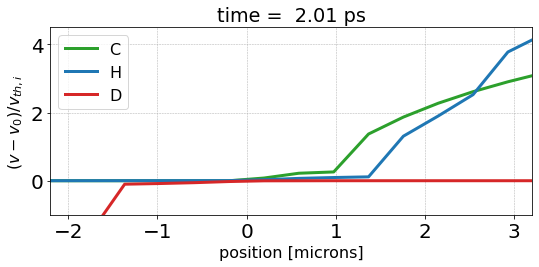

In [10]:
fig, ax2 = plt.subplots(1,1)

ax2.grid(linestyle='dashed', linewidth='0.5')

mpl.style.context('rs_paper')
LW=16
mpl.rcParams['figure.figsize'] = 8,4
mpl.rc('font', size = LW)
mpl.rc('xtick', labelsize=LW)
mpl.rc('ytick', labelsize=LW)
L=200

colors=['#2ca02c','#1f77b4','#bcbd22', '#d62728', '#9467bd']
labels=['C','H','O','D','T']
m = np.array([1.9926e-23,1.6605e-24,2.6566e-23,3.3210778e-24,5.0083e-24])
eps=1.e-20
cvt=1.6008e-19  # units conversion

v0 = (12.0107* dens0*velo0 
       + 1.01   * dens1*velo1     
       + 16.0   * dens2*velo2    
       + 2.014  * dens3*velo3  
       + 3.016  * dens4*velo4) / (12.0107*dens0        
       + 1.01   * dens1
       + 16.0   * dens2
       + 2.014  * dens3
       + 3.016  * dens4)

velo_scale = 1.0e-6
erg_to_ev = 6.2415e11
temp=10
vt_C = np.sqrt(2.0*temp/erg_to_ev/m[0])
vt_H = np.sqrt(2.0*temp/erg_to_ev/m[1])
vt_D = np.sqrt(2.0*temp/erg_to_ev/m[3])

ax2.plot(x,(velo0[idx] - v0[idx])/vt_C,color=colors[0],label=str(labels[0]),linewidth=3.0)
ax2.plot(x,(velo1[idx] - v0[idx])/vt_H,color=colors[1],label=str(labels[1]),linewidth=3.0)
ax2.plot(x,(velo3[idx] - v0[idx])/vt_D,color=colors[3],label=str(labels[3]),linewidth=3.0)

ax2.set_title('time =  {:.2f} ps'.format(time[idx]*1e12))
ax2.set_ylabel(r'$(v-v_0)/v_{th,i}$', size=LW)
ax2.set_xlabel(r'position [microns]', size=LW)
ax2.set_xlim(-2.2,3.2)
ax2.set_ylim(-1,4.5) 
plt.legend()
plt.tight_layout() 

fig.savefig('modmd_testcase_velo_time_'+str(int(time[idx]*1e12))+'_ps.png',dpi=300, bbox_inches = "tight",facecolor='w')

## Sanity check to make sure we are not spitting negative temperatures 

In [11]:
for i in range(5):
    temp = np.loadtxt(prefix + "_temp"+str(i))
    print(str(labels[i])+' min and max temperature at final time, t ='+str(time[idx])+", are :", temp[idx].min(), temp[idx].max()) 

C min and max temperature at final time, t =2.01e-12, are : 8.284325 10.28831
H min and max temperature at final time, t =2.01e-12, are : 8.876337 23.17452
O min and max temperature at final time, t =2.01e-12, are : 7.813678 10.26367
D min and max temperature at final time, t =2.01e-12, are : 9.155048 107.0584
T min and max temperature at final time, t =2.01e-12, are : 8.851012 11.35722
